# import needed module

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame
df = pd.read_csv('Resources/Unemployment_mental_illness_survey.csv')
# df.head()
# 


# Clean DataFrame Title

In [3]:
clean_df=df.rename(columns={"I am currently employed at least part-time":"employed",
                   "I identify as having a mental illness":"mental_illness", 
                   "I have my own computer separate from a smart phone":"own_computer",
                   "I have been hospitalized before for my mental illness":"hospitalized",
                   "How many days were you hospitalized for your mental illness":"hospitalized_days",
                   "I am legally disabled":"disabled",
                "I have my regular access to the internet":"internet",
                   "I live with my parents":"with_parents","I have a gap in my resume":"gap",
                   "Total length of any gaps in my resume in months.":"months_gap",
                   "Annual income (including any social welfare programs) in USD":"income_with_social",
                   "I am unemployed":"unemployed",
                   "I read outside of work and school":"read",
                   "Annual income from social welfare programs":"welfare_income",
                   "I receive food stamps":"food_stamp",
                   "I am on section 8 housing":"section_8",
                   "How many times were you hospitalized for your mental illness":"times_hospitalized",
                   "Lack of concentration":"Lack_concentration",
                   "Obsessive thinking":"Obsessive_thinking",
                   "Mood swings":"Mood_swings",
                   "Panic attacks":"Panic_attacks",
                   "Compulsive behavior":"Compulsive_behavior",
                   "Household Income":"Household_Income",
                   "Device Type":"Device"
                  })
# clean_df

In [4]:
#predict=mental_illness
#we try to the outstanding variable that has the highest correlation to our prediction 
selected_df=clean_df[["employed","mental_illness","Education","hospitalized","disabled","with_parents","gap","income_with_social","read","welfare_income","food_stamp","section_8","Lack_concentration","Anxiety","Depression","Obsessive_thinking","Mood_swings","Panic_attacks","Compulsive_behavior","Tiredness","Age","Gender","Household_Income"]]
selected_df
s_df=selected_df.fillna(0)
s5_df = s_df[s_df.Household_Income != "Prefer not to answer"]
s5_df


,employed,mental_illness,Education,hospitalized,disabled,with_parents,gap,income_with_social,read,welfare_income,...,Anxiety,Depression,Obsessive_thinking,Mood_swings,Panic_attacks,Compulsive_behavior,Tiredness,Age,Gender,Household_Income
0,0,0,High School or GED,0,0,0,1,35,1,0,...,1,1,1.0,0.0,1.0,0.0,0.0,30-44,Male,"$25,000-$49,999"
1,1,1,Some Phd,0,0,0,0,22,1,0,...,1,1,0.0,0.0,1.0,0.0,1.0,18-29,Male,"$50,000-$74,999"
2,1,0,Completed Undergraduate,0,0,0,0,100,1,0,...,0,0,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$150,000-$174,999"
3,0,0,Some Undergraduate,0,0,1,1,0,1,0,...,0,0,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$25,000-$49,999"
4,1,1,Completed Undergraduate,1,1,0,1,32,1,30,...,1,1,1.0,1.0,1.0,1.0,1.0,30-44,Male,"$25,000-$49,999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,0,1,Completed Undergraduate,0,0,0,0,40,1,0,...,1,0,0.0,0.0,0.0,0.0,0.0,18-29,Female,"$50,000-$74,999"
330,1,0,Some Undergraduate,0,0,1,0,62,1,0,...,0,0,0.0,0.0,0.0,0.0,0.0,18-29,Male,"$50,000-$74,999"
331,1,0,Some Undergraduate,0,0,0,0,0,1,1,...,0,0,0.0,0.0,0.0,0.0,0.0,> 60,Female,"$10,000-$24,999"
332,0,1,Some Undergraduate,1,1,1,1,12,1,12,...,1,1,1.0,1.0,1.0,1.0,1.0,18-29,Female,"$0-$9,999"


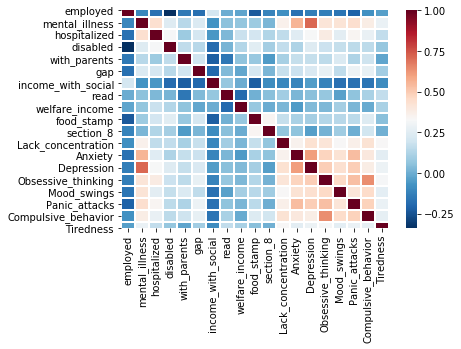

In [5]:
pearsoncorr=s5_df.corr(method='pearson')
import seaborn as sb
sb.heatmap(pearsoncorr,xticklabels=pearsoncorr.columns, yticklabels=pearsoncorr.columns,cmap='RdBu_r', annot=False,linewidth=1)



In [6]:
for each_column in s5_df.columns: 
    print(s5_df[each_column].value_counts())

1    206
0     90
Name: employed, dtype: int64
0    221
1     75
Name: mental_illness, dtype: int64
Completed Undergraduate    90
Some Undergraduate         71
High School or GED         53
Completed Masters          46
Some Masters               12
Completed Phd              10
Some highschool             7
Some Phd                    7
Name: Education, dtype: int64
0    271
1     25
Name: hospitalized, dtype: int64
0    264
1     32
Name: disabled, dtype: int64
0    264
1     32
Name: with_parents, dtype: int64
0    221
1     75
Name: gap, dtype: int64
0      27
100    22
25     11
50     10
35      8
       ..
51      1
48      1
99      1
31      1
43      1
Name: income_with_social, Length: 83, dtype: int64
1    263
0     33
Name: read, dtype: int64
0      246
1        8
2        4
4        4
10       4
12       4
14       2
30       2
25       2
3        1
5        1
6        1
7        1
11       1
13       1
100      1
20       1
93       1
24       1
44       1
45       1
47  

In [7]:
s5_df.corr()

,employed,mental_illness,hospitalized,disabled,with_parents,gap,income_with_social,read,welfare_income,food_stamp,section_8,Lack_concentration,Anxiety,Depression,Obsessive_thinking,Mood_swings,Panic_attacks,Compulsive_behavior,Tiredness
employed,1.000000,-0.104621,-0.168994,-0.337514,-0.148302,-0.172162,0.211700,-0.000788,-0.019763,-0.231704,-0.113385,-0.081043,-0.169795,-0.132393,-0.133364,-0.158503,-0.211043,-0.071182,-0.037102
mental_illness,-0.104621,1.000000,0.437578,0.247439,0.147381,0.232097,-0.067138,0.058279,0.068945,0.090745,0.026442,0.367492,0.560525,0.715468,0.416085,0.424869,0.445601,0.381973,0.285198
hospitalized,-0.168994,0.437578,1.000000,0.324636,0.089883,0.214118,-0.058324,0.030386,0.181725,0.208654,0.128734,0.158913,0.248226,0.327783,0.384564,0.258687,0.345116,0.283545,0.166248
disabled,-0.337514,0.247439,0.324636,1.000000,0.159091,0.147381,-0.181810,0.019620,0.135144,0.253045,0.104330,0.166936,0.124650,0.246394,0.186049,0.170034,0.155605,0.154217,0.074559
with_parents,-0.148302,0.147381,0.089883,0.159091,1.000000,0.197410,-0.220196,-0.153222,0.060623,0.079662,-0.050078,0.108389,0.171953,0.173462,0.153882,0.236609,0.125303,0.192005,-0.019755
gap,-0.172162,0.232097,0.214118,0.147381,0.197410,1.000000,-0.193562,0.033600,-0.016769,0.214527,0.026442,0.179404,0.189047,0.229499,0.278295,0.163461,0.294168,0.274062,0.100033
income_with_social,0.211700,-0.067138,-0.058324,-0.181810,-0.220196,-0.193562,1.000000,0.071007,-0.001071,-0.221662,-0.090275,-0.105218,-0.112453,-0.044854,-0.113662,-0.165761,-0.169124,-0.155680,-0.088636
read,-0.000788,0.058279,0.030386,0.019620,-0.153222,0.033600,0.071007,1.000000,-0.190829,0.009824,0.050951,0.100010,0.024123,0.051374,0.074516,-0.032397,0.060297,0.112224,0.166218
welfare_income,-0.019763,0.068945,0.181725,0.135144,0.060623,-0.016769,-0.001071,-0.190829,1.000000,0.079524,0.000530,0.026776,-0.046191,0.035220,0.029562,0.102060,0.028056,-0.006869,0.112410
food_stamp,-0.231704,0.090745,0.208654,0.253045,0.079662,0.214527,-0.221662,0.009824,0.079524,1.000000,0.343319,0.169814,0.114666,0.104044,0.133903,0.146912,0.148428,0.241953,0.054002


In [8]:
# me_df=s5_df.select_dtypes(include=['object']).copy()
du_df=pd.get_dummies(s5_df, columns=['Education','Age','Gender','Household_Income'])
du_df


,employed,mental_illness,hospitalized,disabled,with_parents,gap,income_with_social,read,welfare_income,food_stamp,...,"Household_Income_$0-$9,999","Household_Income_$10,000-$24,999","Household_Income_$100,000-$124,999","Household_Income_$125,000-$149,999","Household_Income_$150,000-$174,999","Household_Income_$175,000-$199,999","Household_Income_$200,000+","Household_Income_$25,000-$49,999","Household_Income_$50,000-$74,999","Household_Income_$75,000-$99,999"
0,0,0,0,0,0,1,35,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,1,0,0,0,0,22,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,100,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,1,1,1,0,1,32,1,30,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,0,1,0,0,0,0,40,1,0,0,...,0,0,0,0,0,0,0,0,1,0
330,1,0,0,0,1,0,62,1,0,0,...,0,0,0,0,0,0,0,0,1,0
331,1,0,0,0,0,0,0,1,1,1,...,0,1,0,0,0,0,0,0,0,0
332,0,1,1,1,1,1,12,1,12,1,...,1,0,0,0,0,0,0,0,0,0


In [9]:
pd.set_option('display.max_columns', None)
df_df=du_df.drop(["Gender_Female"] ,axis=1)
xd_df=df_df.drop(['mental_illness'],axis=1)
xd_df

,employed,hospitalized,disabled,with_parents,gap,income_with_social,read,welfare_income,food_stamp,section_8,Lack_concentration,Anxiety,Depression,Obsessive_thinking,Mood_swings,Panic_attacks,Compulsive_behavior,Tiredness,Education_Completed Masters,Education_Completed Phd,Education_Completed Undergraduate,Education_High School or GED,Education_Some Phd,Education_Some Undergraduate,Education_Some highschool,Education_Some Masters,Age_18-29,Age_30-44,Age_45-60,Age_> 60,Gender_Male,"Household_Income_$0-$9,999","Household_Income_$10,000-$24,999","Household_Income_$100,000-$124,999","Household_Income_$125,000-$149,999","Household_Income_$150,000-$174,999","Household_Income_$175,000-$199,999","Household_Income_$200,000+","Household_Income_$25,000-$49,999","Household_Income_$50,000-$74,999","Household_Income_$75,000-$99,999"
0,0,0,0,0,1,35,1,0,0,0,1.0,1,1,1.0,0.0,1.0,0.0,0.0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,22,1,0,0,0,1.0,1,1,0.0,0.0,1.0,0.0,1.0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,100,1,0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
3,0,0,0,1,1,0,1,0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
4,1,1,1,0,1,32,1,30,0,0,1.0,1,1,1.0,1.0,1.0,1.0,1.0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,0,0,0,0,0,40,1,0,0,0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
330,1,0,0,1,0,62,1,0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
331,1,0,0,0,0,0,1,1,1,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
332,0,1,1,1,1,12,1,12,1,0,1.0,1,1,1.0,1.0,1.0,1.0,1.0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0


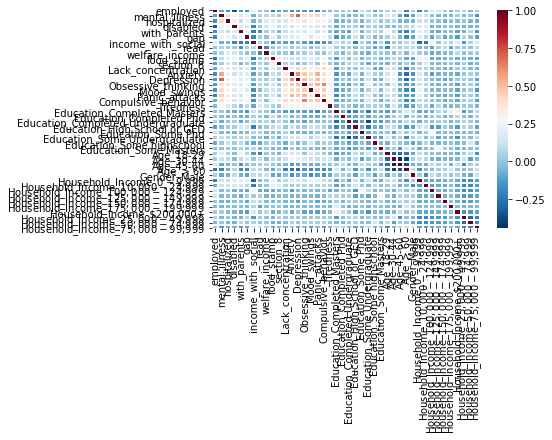

In [10]:
pearsoncorr=df_df.corr(method='pearson')
import seaborn as sb
sb.heatmap(pearsoncorr,xticklabels=pearsoncorr.columns, yticklabels=pearsoncorr.columns,cmap='RdBu_r', annot=False,linewidth=1)



In [11]:
X=xd_df.values
# X = s10_df[["employed","hospitalized","disabled","with_parents","gap","income_with_social","read","welfare_income","food_stamp","section_8","Lack_concentration","Anxiety","Depression","Obsessive_thinking","Mood_swings","Panic_attacks","Compulsive_behavior","Tiredness","educ_label","income_label","age_label","gender_label"]]
y = df_df.mental_illness.values.reshape(-1, 1)
print(X.shape, y.shape)
X

(296, 41) (296, 1)


array([[0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.]])

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
from sklearn.preprocessing import StandardScaler
X_scaler=StandardScaler().fit(X_train)
# y_scaler=StandardScaler().fit(y_train)



In [13]:
X_train_scaled=X_scaler.transform(X_train)
X_test_scaled=X_scaler.transform(X_test)
# y_train_scaled=y_scaler.transform(y_train)
# y_test_scaled=y_scaler.transform(y_train)


In [14]:
from sklearn import metrics
def train_model(classifier, feature_vector_train, train_label, feature_vector_valid, valid_label, is_neural_net=False):
    classifier.fit(feature_vector_train, train_label)
    predictions=classifier.predict(feature_vector_valid)
    if is_neural_net:
        predictions=predictions.argmax(axis=-1)
    return metrics.accuracy_score(predictions, valid_label)



# Logistic Regression

In [15]:
# first:# LogisticRegression
from sklearn.linear_model import LogisticRegression
# classifier=LogisticRegression()
# classifier.fit(X_train_scaled,y_train)
# print(classifier.score(X_train_scaled,y_train))
# print(classifier.score(X_test_scaled,y_test))
log_accuracy=train_model(LogisticRegression(),X_train_scaled,y_train, X_test_scaled,y_test)
print(log_accuracy)
print("-"*12)



0.7972972972972973
------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


# Decision Tree

In [16]:
# second: decision Tree
from sklearn import tree
tree_accuracy=train_model(tree.DecisionTreeClassifier(),X_train_scaled,y_train, X_test_scaled,y_test)
print(tree_accuracy)

0.7972972972972973


In [17]:
import graphviz 

# clf = tree.DecisionTreeClassifier()
# X=X_columns
X=xd_df.values
y=df_df.mental_illness.values.reshape(-1, 1)
# clf=clf.fit(X_test_scaled,y_test)


In [18]:
X_columns=pd.Index.tolist(xd_df.columns)
X_columns[11]

'Anxiety'

In [24]:
clf = tree.DecisionTreeClassifier(criterion = "gini", splitter = "best", max_depth = None)
clf=clf.fit(X_test_scaled,y_test)
import matplotlib.pyplot as plt
plt.figure(figsize=(200,200))
tree.plot_tree(clf,filled=True, proportion=True, feature_names=X_columns, fontsize=50)


[Text(6867.692307692308, 10095.42857142857, 'Depression <= 0.48\ngini = 0.382\nsamples = 100.0%\nvalue = [0.743, 0.257]'),
 Text(5150.7692307692305, 8542.285714285714, 'hospitalized <= 1.481\ngini = 0.165\nsamples = 74.3%\nvalue = [0.909, 0.091]'),
 Text(4292.307692307692, 6989.142857142857, 'Mood_swings <= 1.096\ngini = 0.107\nsamples = 71.6%\nvalue = [0.943, 0.057]'),
 Text(3433.846153846154, 5436.0, 'Education_Some\xa0Masters <= 2.33\ngini = 0.074\nsamples = 70.3%\nvalue = [0.962, 0.038]'),
 Text(1716.923076923077, 3882.857142857143, 'Lack_concentration <= 0.894\ngini = 0.039\nsamples = 67.6%\nvalue = [0.98, 0.02]'),
 Text(858.4615384615385, 2329.7142857142862, 'gini = 0.0\nsamples = 62.2%\nvalue = [1.0, 0.0]'),
 Text(2575.3846153846152, 2329.7142857142862, 'income_with_social <= -0.212\ngini = 0.375\nsamples = 5.4%\nvalue = [0.75, 0.25]'),
 Text(1716.923076923077, 776.5714285714294, 'gini = 0.0\nsamples = 4.1%\nvalue = [1.0, 0.0]'),
 Text(3433.846153846154, 776.5714285714294, 'gini

In [25]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(120,120))
# tree.plot_tree(clf, fontsize=50)



In [26]:
# import os 
# os.environ["PATH"]+=os.pathsep+'/usr/local/bin/graphviz/dot⁩'
# dot_data=tree.export_graphviz(
#     clf, out_file=None, 
#     feature_names=X_columns, 
#     class_names=y, 
#     filled=True, 
#     rounded=True, 
#     special_characters=True)
# # (decision_tree, out_file=None, *, max_depth=None, feature_names=None, class_names=None, label='all', filled=False, leaves_parallel=False, impurity=True, node_ids=False, proportion=False, rotate=False, rounded=False, special_characters=False, precision=3)

# import pydotplus
# # (decision_tree, out_file=None, *, max_depth=None, feature_names=None, class_names=None, label='all', filled=False, leaves_parallel=False, impurity=True, node_ids=False, proportion=False, rotate=False, rounded=False, special_characters=False, precision=3
# graph=pydotplus.graph_from_dot_data(dot_data)
# graph=graphviz.Source(dot_data)
# graph

# Random Forest 

In [27]:
from sklearn.ensemble import RandomForestClassifier
forest_accuracy=train_model(RandomForestClassifier(n_estimators=50),X_train_scaled,y_train, X_test_scaled,y_test)
print(forest_accuracy)



0.8243243243243243


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
rf=RandomForestClassifier().fit(X_train_scaled,y_train)
r=rf.score(X_test_scaled,y_test)
print(r)

0.8378378378378378


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [29]:
sorted(zip(rf.feature_importances_,xd_df),reverse=True)

[(0.248492341782022, 'Depression'),
 (0.11476771817552031, 'Anxiety'),
 (0.08061730930259219, 'income_with_social'),
 (0.0498310387272032, 'Mood_swings'),
 (0.04131142335735843, 'hospitalized'),
 (0.04085575285413823, 'Obsessive_thinking'),
 (0.033199174203351375, 'Lack_concentration'),
 (0.027828615001281393, 'Compulsive_behavior'),
 (0.025404973141184867, 'Panic_attacks'),
 (0.021107703068562442, 'Tiredness'),
 (0.02021145737308911, 'Age_18-29'),
 (0.02017441009825324, 'Age_30-44'),
 (0.019756232317910977, 'welfare_income'),
 (0.01964609292785145, 'Gender_Male'),
 (0.018728097783567536, 'Education_Completed Undergraduate'),
 (0.018055991188607092, 'Education_High School or GED'),
 (0.017555450046208784, 'Education_Completed Masters'),
 (0.017367174424411363, 'Household_Income_$50,000-$74,999'),
 (0.015021190094811064, 'gap'),
 (0.014010272914855633, 'Household_Income_$25,000-$49,999'),
 (0.01347828438292099, 'Age_45-60'),
 (0.013089116305406717, 'Household_Income_$10,000-$24,999'),
 

In [30]:

list1=list(rf.feature_importances_)
list2=list(xd_df)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40],
 <a list of 41 Text xticklabel objects>)

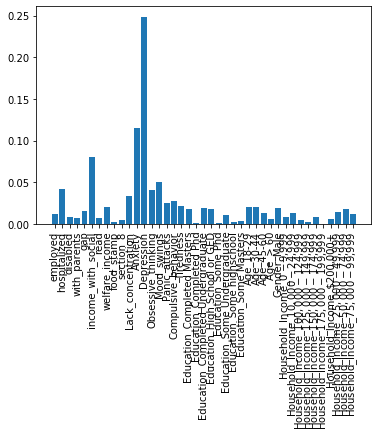

In [31]:
plt.bar(x=list2, height=list1)
plt.xticks(rotation=90)


# KNNeighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# neigh = KNeighborsClassifier(n_neighbors=2)
# neigh.fit(X_train_scaled,y_train)
# neigh.predict_proba(X_test_scaled)

neigh_accuracy=train_model(KNeighborsClassifier(n_neighbors=2),X_train_scaled,y_train, X_test_scaled,y_test)
neigh_accuracy

# Svm.SVC

In [ ]:
from sklearn.svm import SVC
svc_accuracy=train_model(SVC(),X_train_scaled,y_train, X_test_scaled,y_test)
svc_accuracy
# clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

# Naive_Bayes MultinomialNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

nb_accuracy=train_model(MultinomialNB(),X_train,y_train, X_test,y_test)
nb_accuracy

# Naive_Bayes.GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb_accuracy=train_model(GaussianNB(),X_train,y_train, X_test,y_test)
gnb_accuracy

# Neural Newwork

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model=Sequential()
model.add(Dense(units=41,activation='relu', input_dim=41))
model.add(Dense(units=2, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# model.evaluate(X_test_scaled, y_test, verbose=2)

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# X_scaler = MinMaxScaler().fit(X)
# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# model.fit(X_test_scaled, y_test, epochs=20, shuffle=True,verbose=2)